In [1]:
!pip install matplotlib
!pip install plotly


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style = "darkgrid",font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [3]:
d = pd.read_csv("Advertising.csv")

In [4]:
d

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
d.head() #first five entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
d.tail() #last five entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
d.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
d

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
d.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
d.shape

(200, 4)

In [14]:
d[d.duplicated()].any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [15]:
d.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


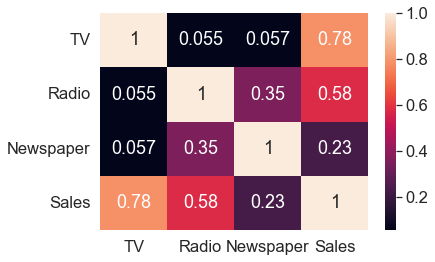

In [16]:
sns.heatmap(d.corr(),annot=True)
plt.show()

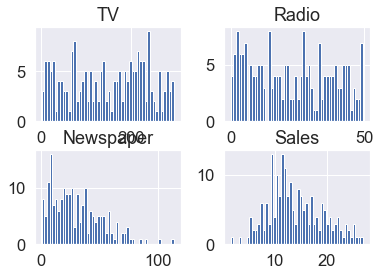

In [18]:
d.hist(bins=50)
plt.show()

In [22]:
f  = px.scatter(d,x = 'TV',y = 'Sales')
f.show()
f  = px.scatter(d,x = 'Radio',y = 'Sales')
f.show()
f  = px.scatter(d,x = 'Newspaper',y = 'Sales')
f.show()


In [26]:
import plotly.express as px
f = px.scatter(d, x='TV',y='Newspaper',color='Sales',size ='Radio',hover_data=['Sales'])
f.show()

In [27]:
x = d.drop(columns=['Sales','Newspaper'])
y = d[['Sales']]

In [30]:
x

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [31]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((160, 2), (160, 1), (40, 2), (40, 1))

In [34]:
model = LinearRegression()

In [35]:
model.fit(xtrain,ytrain)

LinearRegression()

In [39]:
t_d = model.predict(xtrain)
te_d = model.predict(xtest)

In [41]:
r2_score(ytrain,t_d)*100  #Accuracy for Training data


89.55982149747163

In [42]:
r2_score(ytest,te_d)*100   #Accuracy for Testing data

90.05833101920356

In [43]:
mean_absolute_error(ytest,te_d)

1.444302313822758

In [44]:
0.5**mean_squared_error(ytest,te_d)

0.11360135837622083

In [45]:
mean_absolute_percentage_error(ytest,te_d)

0.15090256196305074

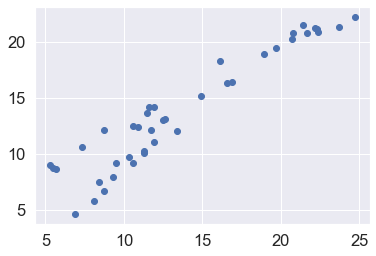

In [48]:
plt.scatter(ytest,te_d,c = 'b')